In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Output')
cur_date = "052423"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in file
var_imp_df = data.frame(read_excel("Variable_Importance_052423.xlsx")) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(var_imp_df)

,Predictor,Outcome,Importance,Model
,<chr>,<chr>,<dbl>,<chr>
1,Casing_Depth,Detect_Concentration,0.007375083,Linear-SVM
2,Flow_Rate,Detect_Concentration,0.017930298,Linear-SVM
3,Static_Water_Depth,Detect_Concentration,0.012070605,Linear-SVM
4,Water_Sample_Date,Detect_Concentration,-0.007841285,Linear-SVM
5,Well_Depth,Detect_Concentration,-0.017484962,Linear-SVM
6,pH,Detect_Concentration,0.056215000,Linear-SVM


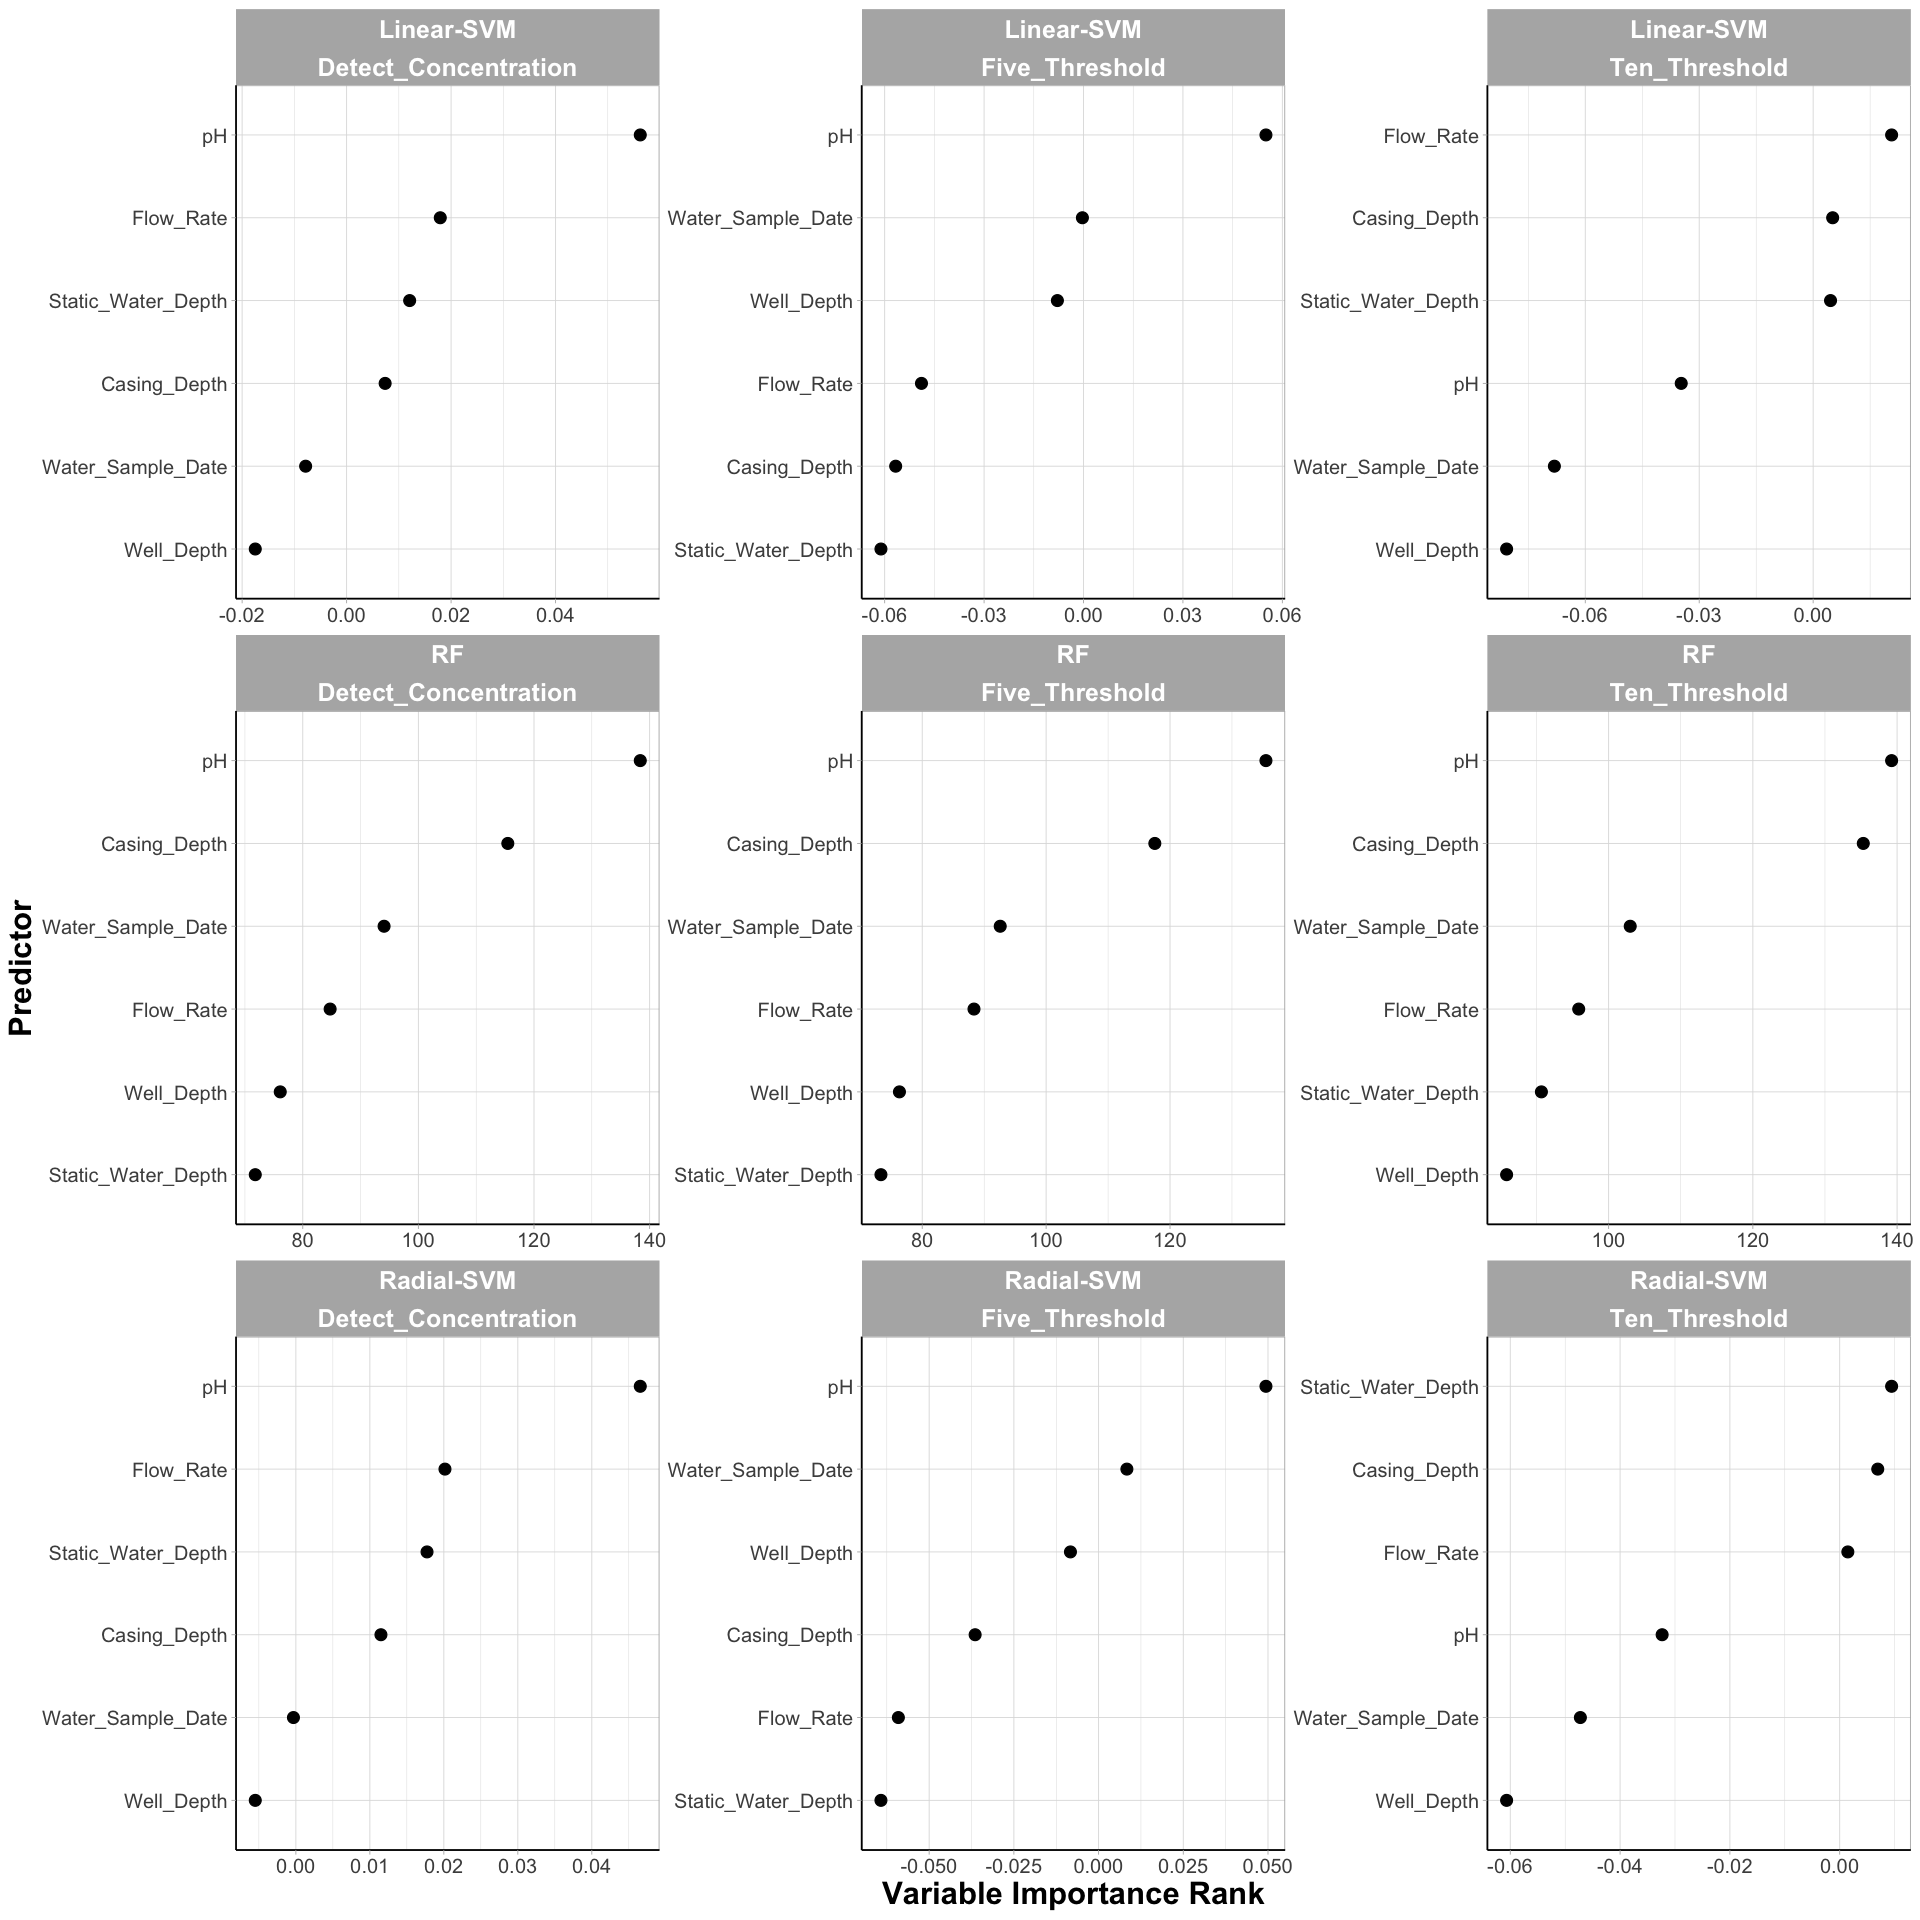

In [6]:
options(repr.plot.width=16, repr.plot.height=16) #changing size

ggplot() + 
  geom_point(data = var_imp_df, 
             aes(x = Importance, y = reorder_within(Predictor, Importance, list(Model, Outcome))), size = 3) + 

  #geom_vline(xintercept = 0, color = "blue", linetype = "dotdash") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(Model~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none")